In [22]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

1 ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

In [30]:
df= pd.read_csv("continentes_sin_nulos.csv", index_col=0)
df.head(5)

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,latitude,longitude,Continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
0,Afghanistan,60.0,AF,58.1,Kabul,AFN,2.1,104.0,Kabul,Pashto,48.90,9.3,33.939110,67.709953,Asia,0.70,64.500000,652230.0,323000.0,32.49,93.0,8672.0,149.900,2.30,4.47,1.910135e+10,9.70,47.9,638.0,0.43,78.4,38041754.0,71.40,11.120,9797273.0
1,Albania,105.0,AL,43.1,Tirana,ALL,28.1,107.0,Tirana,Albanian,55.70,18.6,41.153332,20.168331,Europa,1.36,78.500000,28748.0,9000.0,11.78,355.0,4536.0,119.050,1.40,1.62,1.527808e+10,55.00,7.8,15.0,1.12,56.9,2854191.0,36.60,12.330,1747593.0
2,Algeria,18.0,DZ,17.4,Algiers,DZD,0.8,109.9,Algiers,Arabic,41.20,37.2,28.033886,1.659626,Asia,0.28,76.700000,2381741.0,317000.0,24.28,213.0,150006.0,151.360,2.00,3.02,1.699882e+11,51.40,20.1,112.0,0.95,28.1,43053054.0,66.10,11.700,31510100.0
3,Andorra,164.0,AD,40.0,Andorra la Vella,EUR,34.0,106.4,Andorra la Vella,Catalan,62.45,16.3,42.506285,1.521801,Europa,1.51,80.442372,468.0,10800.0,7.20,376.0,469.0,169.706,6.82,1.27,3.154058e+09,9.82,2.7,436.8,6.63,36.4,77142.0,34.84,8.058,67873.0
4,Angola,26.0,AO,47.5,Luanda,AOA,46.3,113.5,Luanda,Portuguese,77.50,9.2,-11.202692,17.873887,Africa,0.97,60.800000,1246700.0,117000.0,40.73,244.0,34693.0,261.730,17.10,5.52,9.463542e+10,9.30,51.6,241.0,0.71,33.4,31825295.0,49.10,6.890,21061025.0


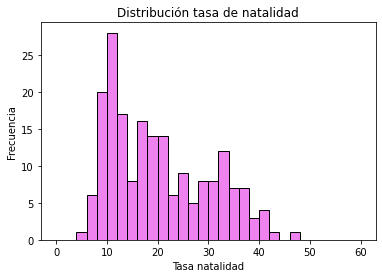

In [31]:
plt.hist(x = "birthrate_k", 
         data = df, 
         bins = 30, 
         color = "violet", 
         edgecolor = "black", 
         range = [0, 60])

plt.xlabel("Tasa natalidad")
plt.ylabel("Frecuencia")
plt.title('Distribución tasa de natalidad');

2 ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

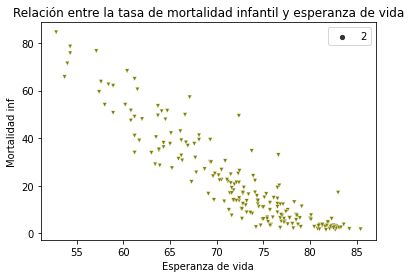

In [32]:
sns.scatterplot(x = "lifeexpectancy_i", 
                y = "infantmortality_k", 
                data = df,
                size = 2,
                marker = "v",
                color = "olive")

plt.xlabel("Esperanza de vida")
plt.ylabel("Mortalidad inf")
plt.title('Relación entre la tasa de mortalidad infantil y esperanza de vida');

cuanto mayor es la tasa de mortalidad infantil, es menor la esperanza de vida

3¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.
África

In [33]:
df_continent = df.groupby("Continent")["country"].count().reset_index()

In [38]:
df_continent

,Continent,country
0,Africa,12
1,America,36
2,Asia,96
3,Europa,43
4,Oceania,8


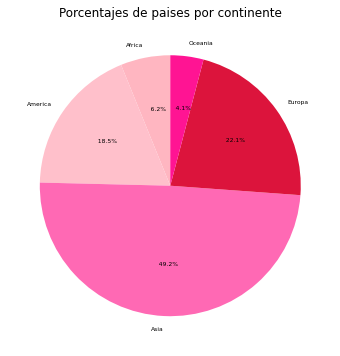

In [43]:
colores = ["lightpink", "pink", "hotpink", "crimson", "deeppink"]

plt.pie( df_continent['country'], 
        labels=df_continent['Continent'],
        autopct = '%6.1f%%', 
        colors = colores, 
        textprops = {'fontsize': 6}, 
        startangle = 90)

plt.title('Porcentajes de paises por continente')
plt.gcf().set_size_inches(8,6)
plt.show();

4 ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

In [13]:
esperanza_europa = df[df["Continent"] == "Europa"]
esperanza_europa

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,latitude,longitude,Continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
1,Albania,105.0,AL,43.1,Tirana,ALL,28.1,107.00,Tirana,Albanian,55.70,18.6,41.153332,20.168331,Europa,1.360000,78.500000,28748.0,9000.0,11.780,355.0,4536.0,119.050,1.40,1.620,1.527808e+10,55.00,7.80,15.0,1.120,56.90,2854191.0,36.60,12.330,1747593.0
3,Andorra,164.0,AD,40.0,Andorra la Vella,EUR,34.0,106.40,Andorra la Vella,Catalan,62.45,16.3,42.506285,1.521801,Europa,1.510000,80.442372,468.0,10800.0,7.200,376.0,469.0,169.706,6.82,1.270,3.154058e+09,9.82,2.70,436.8,6.630,36.40,77142.0,34.84,8.058,67873.0
9,Austria,109.0,AT,32.4,Vienna,EUR,46.9,103.10,Vienna,German,60.70,25.4,47.516231,14.550072,Europa,1.200000,81.600000,83871.0,21000.0,9.700,43.0,61448.0,118.060,1.50,1.470,4.463147e+11,85.10,2.90,5.0,2.612,17.90,8877067.0,51.40,4.670,5194416.0
15,Belarus,47.0,BY,42.0,Minsk,BYN,42.6,100.50,Minsk,Russian,64.10,14.7,53.709807,27.953389,Europa,0.600000,74.200000,207600.0,155000.0,9.900,375.0,58280.0,163.306,5.60,1.450,6.308046e+10,87.40,2.60,2.0,1.490,34.50,9466856.0,53.30,4.590,7482982.0
16,Belgium,383.0,BE,44.6,City of Brussels,EUR,22.6,103.90,Brussels,French,53.60,24.0,50.503887,4.469936,Europa,1.430000,81.600000,30528.0,32000.0,10.300,32.0,96889.0,117.110,1.40,1.620,5.296067e+11,79.70,2.90,5.0,10.310,17.60,11484055.0,55.40,5.590,11259082.0
21,Bosnia and Herzegovina,64.0,BA,43.1,Sarajevo,BAM,42.7,102.55,Tuzla Canton,Bosnian,46.40,20.4,43.915886,17.679076,Europa,1.050000,77.300000,51197.0,11000.0,8.110,387.0,21848.0,104.900,0.60,1.270,2.004785e+10,23.30,5.00,10.0,1.040,28.60,3301000.0,23.70,18.420,1605144.0
25,Bulgaria,64.0,BG,46.3,Sofia,BGN,35.4,89.30,Sofia,Bulgarian,55.40,20.2,42.733883,25.485830,Europa,1.110000,74.900000,110879.0,31000.0,8.900,359.0,41708.0,114.420,3.10,1.560,8.600000e+10,71.00,5.90,10.0,1.570,47.70,6975761.0,28.30,4.340,5256027.0
41,Croatia,73.0,HR,27.6,Zagreb,HRK,34.4,96.50,Zagreb,Croatian,51.20,22.0,45.100000,15.200000,Europa,1.260000,78.100000,56594.0,18000.0,9.000,385.0,17488.0,109.820,0.80,1.470,6.041555e+10,67.90,4.00,8.0,2.920,15.20,4067500.0,20.50,6.930,2328318.0
44,Czech Republic,139.0,CZ,45.2,Prague,CZK,34.6,100.70,Prague,Czech,60.60,14.9,49.817492,15.472962,Europa,1.170000,79.000000,78867.0,23000.0,10.700,420.0,102218.0,116.480,2.80,1.690,2.464892e+11,64.10,2.70,3.0,3.000,14.80,10669709.0,46.10,1.930,7887156.0
46,Denmark,137.0,DK,62.0,Copenhagen,DKK,14.7,101.30,Copenhagen,Danish,62.20,32.4,56.263920,9.501785,Europa,1.550000,81.000000,43094.0,15000.0,10.600,45.0,31786.0,110.350,0.80,1.730,3.480780e+11,80.60,3.60,4.0,2.952,13.70,5818553.0,23.80,4.910,5119978.0


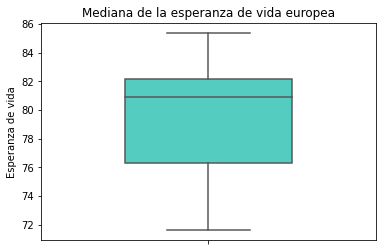

In [14]:
sns.boxplot(y = "lifeexpectancy_i", 
            data = esperanza_europa,
            width = 0.5, 
            color = "turquoise")

plt.ylabel("Esperanza de vida")
plt.title('Mediana de la esperanza de vida europea');     

In [15]:
df.head(2)

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,latitude,longitude,Continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
0,Afghanistan,60.0,AF,58.1,Kabul,AFN,2.1,104.0,Kabul,Pashto,48.9,9.3,33.939110,67.709953,Asia,0.70,64.5,652230.0,323000.0,32.49,93.0,8672.0,149.90,2.3,4.47,1.910135e+10,9.7,47.9,638.0,0.43,78.4,38041754.0,71.4,11.12,9797273.0
1,Albania,105.0,AL,43.1,Tirana,ALL,28.1,107.0,Tirana,Albanian,55.7,18.6,41.153332,20.168331,Europa,1.36,78.5,28748.0,9000.0,11.78,355.0,4536.0,119.05,1.4,1.62,1.527808e+10,55.0,7.8,15.0,1.12,56.9,2854191.0,36.6,12.33,1747593.0


5 ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, 
#densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

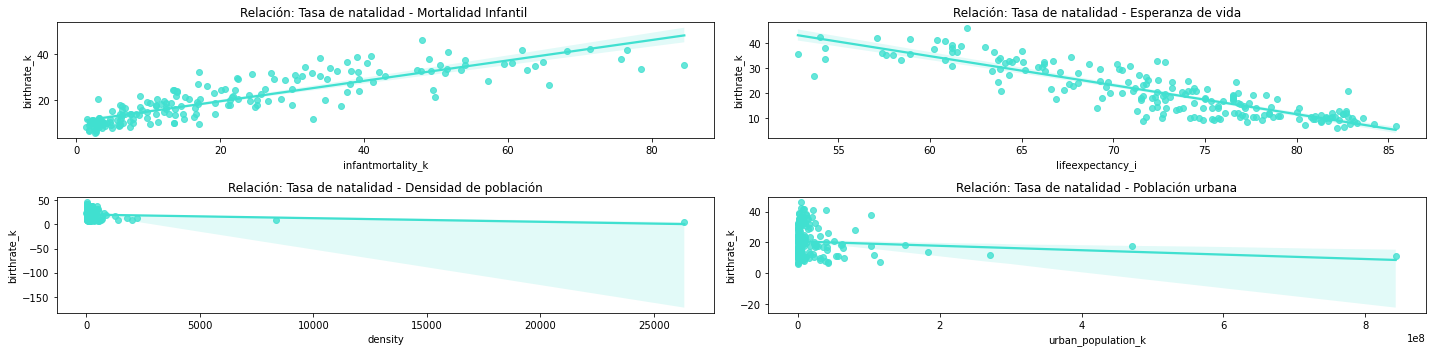

In [16]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 5))
axes = axes.flat


sns.regplot(y = "birthrate_k", 
            x = "infantmortality_k",
            data = df, 
            color = "turquoise", 
            ax = axes[0])


axes[0].set_title("Relación: Tasa de natalidad - Mortalidad Infantil ")


sns.regplot(y = "birthrate_k", 
            x = "lifeexpectancy_i",
            data = df, 
            color = "turquoise", 
            ax = axes[1])


axes[1].set_title("Relación: Tasa de natalidad - Esperanza de vida")


sns.regplot(y = "birthrate_k", 
            x = "density",
            data = df, 
            color = "turquoise", 
            ax = axes[2])

axes[2].set_title("Relación: Tasa de natalidad - Densidad de población")


sns.regplot(y = "birthrate_k", 
            x = "urban_population_k",
            data = df, 
            color = "turquoise", 
            ax = axes[3])

axes[3].set_title("Relación: Tasa de natalidad - Población urbana")
plt.tight_layout();

6 ¿Cuáles son los 10 países con la mayor área forestal?

In [17]:
df.head(1)

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,latitude,longitude,Continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
0,Afghanistan,60.0,AF,58.1,Kabul,AFN,2.1,104.0,Kabul,Pashto,48.9,9.3,33.93911,67.709953,Asia,0.7,64.5,652230.0,323000.0,32.49,93.0,8672.0,149.9,2.3,4.47,1.910135e+10,9.7,47.9,638.0,0.43,78.4,38041754.0,71.4,11.12,9797273.0


In [18]:
df_forestedarea  = df[['forestedarea','country']].sort_values(by='forestedarea', ascending = False).head(10)
df_forestedarea

,forestedarea,country
167,98.3,Suriname
111,91.9,Federated States of Micronesia
61,90.0,Gabon
154,88.4,Seychelles
132,87.6,Palau
71,83.9,Guyana
92,82.1,Laos
159,77.9,Solomon Islands
135,74.1,Papua New Guinea
59,73.1,Finland


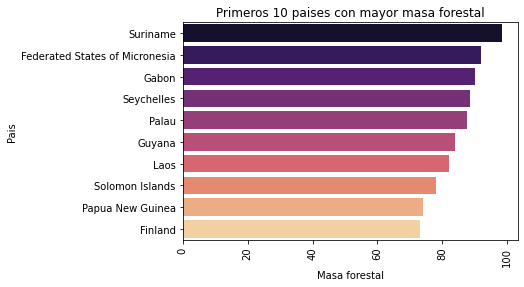

In [45]:
sns.barplot(x = "forestedarea", 
            y = "country",
            data = df_forestedarea,
            palette = "magma", 
            order = ['Suriname', 'Federated States of Micronesia', "Gabon", "Seychelles","Palau", "Guyana", "Laos", "Solomon Islands","Papua New Guinea", "Finland" ])

plt.xticks(rotation = 90)

plt.title("Primeros 10 paises con mayor masa forestal")
plt.xlabel("Masa forestal")
plt.ylabel("Pais");

7. ¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?

In [71]:
df_natalidad = df.sort_values(by =["birthrate_k"], ascending = True)

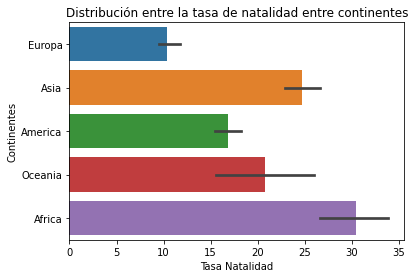

In [74]:
sns.barplot(data =df_natalidad,
             x="birthrate_k", 
             y="Continent")

plt.title("Distribución entre la tasa de natalidad entre continentes")
plt.xlabel("Tasa Natalidad")
plt.ylabel("Continentes");

8. ¿Cómo se relacionan el CPI y el precio de la gasolina? Crea un scatter plot que muestre esta relación y agrega una línea para visualizar la tendencia. Ajusta los valores del CPI entre 100 y 300?

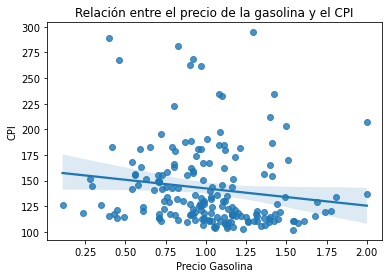

In [47]:
df_cpi = df[df["cpi_k"].between(100,300)]
sns.regplot(x = "gasolineprice_i",
            y = "cpi_k",
            data = df_cpi)
plt.title("Relación entre el precio de la gasolina y el CPI")
plt.xlabel("Precio Gasolina")
plt.ylabel("CPI");

In [60]:
df.sample(5)

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,latitude,longitude,Continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
166,Sudan,25.0,SD,28.7,Khartoum,SDG,8.1,76.8,Omdurman,Arabic,48.4,8.0,12.862807,30.217636,Asia,0.95,65.1,1861484.0,124000.0,32.18,249.0,20000.0,1344.190,51.0,4.41,1.890228e+10,16.9,42.1,295.0,0.410,63.2,42813238.0,45.4,16.53,14957233.0
8,Australia,3.0,AU,48.2,Canberra,AUD,16.3,100.3,Sydney,Unknown,65.5,23.0,-25.274398,133.775136,Oceania,0.93,82.7,7741220.0,58000.0,12.60,61.0,375908.0,119.800,1.6,1.74,1.392681e+12,113.1,3.1,6.0,13.590,19.6,25766605.0,47.4,5.27,21844756.0
24,Brunei,83.0,BN,2.7,Bandar Seri Begawan,BND,72.1,103.2,Unknown,Malay,64.7,16.3,4.535277,114.727669,Asia,0.37,75.7,5765.0,8000.0,14.90,673.0,7664.0,99.030,-0.4,1.85,1.346942e+10,31.4,9.8,31.0,1.412,6.0,433285.0,8.0,9.12,337711.0
138,Philippines,368.0,PH,41.7,Manila,PHP,27.8,107.5,Manila,English,59.6,14.0,12.879721,121.774017,Asia,0.86,71.1,300000.0,153000.0,20.55,63.0,122287.0,129.610,2.5,2.58,3.767955e+11,35.5,22.5,121.0,1.120,53.5,108116615.0,43.1,2.15,50975903.0
15,Belarus,47.0,BY,42.0,Minsk,BYN,42.6,100.5,Minsk,Russian,64.1,14.7,53.709807,27.953389,Europa,0.60,74.2,207600.0,155000.0,9.90,375.0,58280.0,163.306,5.6,1.45,6.308046e+10,87.4,2.6,2.0,1.490,34.5,9466856.0,53.3,4.59,7482982.0


9. ¿Cómo varía la esperanza de vida entre los diferentes países de Oceanía? Utiliza un diagrama de violín para representar la distribución de la esperanza de vida en función del idioma oficial de cada país.

In [61]:
oceania = df['Continent'] == 'Oceania'

In [62]:
df_oceania= df[oceania]

In [63]:
df_oceania.groupby('officiallanguage')['population_k'].sum().reset_index()

,officiallanguage,population_k
0,English,4841000.0
1,Fiji Hindi,889953.0
2,French,1565593.0
3,Samoan,202506.0
4,Tongan Language,100209.0
5,Unknown,25981661.0


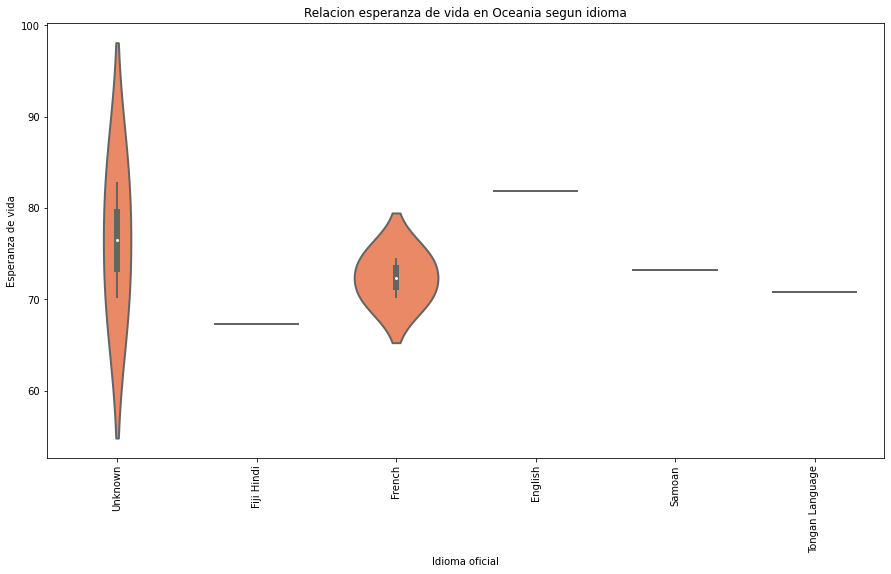

In [67]:
sns.violinplot(x = "officiallanguage",
               y= "lifeexpectancy_i", 
               data = df_oceania, 
               width = 0.6, 
               color = "coral", 
               linewidth = 2)
               
plt.xticks(rotation = 90)

plt.xlabel('Idioma oficial')
plt.ylabel('Esperanza de vida')
plt.title('Relacion esperanza de vida en Oceania segun idioma')

plt.gcf().set_size_inches(15,8); 

10. Queremos analizar la relación entre la tasa de impuestos total, el PIB per cápita y la tasa de alfabetización. Crea un conjunto de subplots con tres gráficas:
- Un scatter plot que muestre la relación entre el PIB per cápita y el CPI.
- Un histograma de la tasa de impuestos total.
- Un gráfico de barras que resuma la tasa de impuestos total por continente.

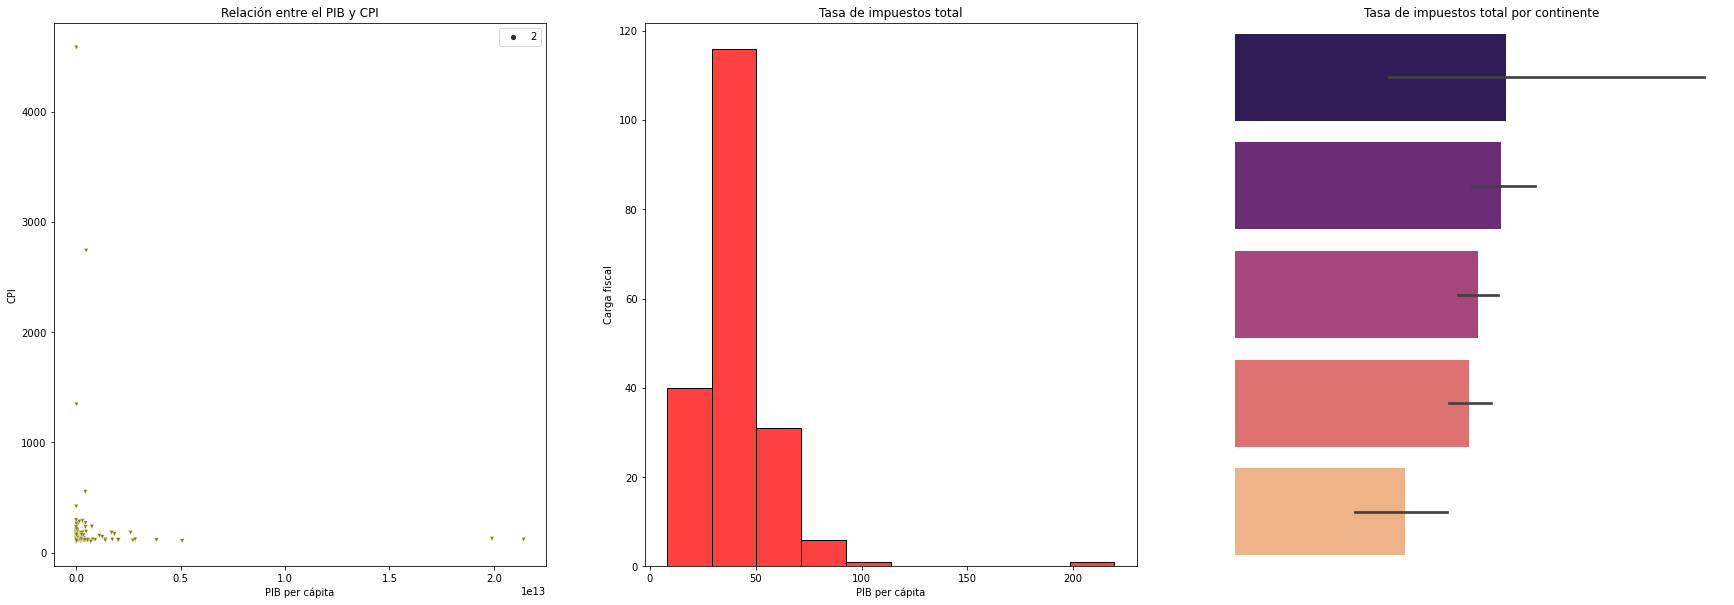

In [57]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

axes = axes.flat

axes[2].axis('off')

sns.scatterplot(x='gdp_k',
                y='cpi_k',
                data=df,
                size=2,
                marker='v',
                color='olive',
                ax=axes[0])
axes[0].set_title("Relación entre el PIB y CPI")
axes[0].set_xlabel("PIB per cápita")
axes[0].set_ylabel("CPI")


sns.histplot(x='totaltaxrate_k',
             data=df,
             bins=10,
             color='r',
             ax=axes[1])
axes[1].set_title("Tasa de impuestos total")
axes[1].set_xlabel("PIB per cápita")
axes[1].set_ylabel("Carga fiscal")

sns.barplot(x='totaltaxrate_k',
            y='Continent',
            data=df,
            palette="magma",
            order=['Africa', 'America', 'Asia', 'Europa', 'Oceania'],
            ax=axes[2])
axes[2].set_title("Tasa de impuestos total por continente")
axes[2].set_ylabel("Continente")
axes[2].set_xlabel("Tasa de impuesto total")

plt.subplots_adjust(hspace=0.5)
plt.show();